# Decision Tree를 이용한 Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. 데이터 읽어오기

In [2]:
data_path = "data/abalone.csv"
label_path = "data/abalone_attributes.txt"

col = list()

with open( label_path,'r') as f:
    col = f.read().split('\n') 

abalone_data = pd.read_csv(data_path , names=col)
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


## 1.2. 데이터 확인

In [3]:
np_abalone_data = np.array(abalone_data)
print(np_abalone_data)

[['M' 0.455 0.365 ... 0.10099999999999999 0.15 15]
 ['M' 0.35 0.265 ... 0.0485 0.07 7]
 ['F' 0.53 0.42 ... 0.1415 0.21 9]
 ...
 ['M' 0.6 0.475 ... 0.2875 0.308 9]
 ['F' 0.625 0.485 ... 0.261 0.29600000000000004 10]
 ['M' 0.71 0.555 ... 0.3765 0.495 12]]


## 1.3. sex column을 Y로, 나머지는 X로 분할

In [4]:
datax = np_abalone_data[:,1:]
datay = np_abalone_data[:,0]

In [5]:
print('datax\n', datax)
print('--------------------------------')
print('datay\n', datay)

datax
 [[0.455 0.365 0.095 ... 0.10099999999999999 0.15 15]
 [0.35 0.265 0.09 ... 0.0485 0.07 7]
 [0.53 0.42 0.135 ... 0.1415 0.21 9]
 ...
 [0.6 0.475 0.205 ... 0.2875 0.308 9]
 [0.625 0.485 0.15 ... 0.261 0.29600000000000004 10]
 [0.71 0.555 0.195 ... 0.3765 0.495 12]]
--------------------------------
datay
 ['M' 'M' 'F' ... 'M' 'F' 'M']


## 1.4. train data : test data = 7 : 3 분할

In [6]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax,datay,test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


## 2.1. DecisionTree 모델

In [7]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split=3)
tree_model.fit(X = trnx, y=trny)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2.1.1. 정규화를 거치지 않은 Train_y와 Test_y의 정확도

In [8]:
tree_pred_trn = tree_model.predict(X=trnx)
tree_pred_tst = tree_model.predict(X=tstx)

In [9]:
from sklearn.metrics import accuracy_score
print('Train_Y\'s Accuracy with Unregularized X_data: ', float(format(accuracy_score(trny, tree_pred_trn),".3f")) * 100,'%')
print('Test_Y\'s Accuracy with Unregularized X_data: ', float(format(accuracy_score(tsty, tree_pred_tst),".3f")) * 100,'%')

Train_Y's Accuracy with Unregularized X_data:  56.99999999999999 %
Test_Y's Accuracy with Unregularized X_data:  55.50000000000001 %


### 2.2.1 min-max정규화

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)
print(np.min(trnx_scale[:,0]), np.max(trnx_scale[:,0]))
print(np.min(tstx_scale[:,0]), np.max(tstx_scale[:,0]))

0.0 0.9999999999999998
-0.050724637681159424 1.0217391304347823


C:\Users\InT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### 2.2.2. 정규화를 거친 Train_y와 Test_y의 정확도

In [11]:
from sklearn import tree
tree_model_scale = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split=3)
tree_model_scale.fit(X = trnx_scale, y=trny)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
tree_pred_trn_scale = tree_model.predict(X=trnx_scale)
tree_pred_tst_scale = tree_model.predict(X=tstx_scale)

In [13]:
tree_model_scale = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split=3)
tree_model_scale.fit(X = trnx_scale, y=trny)
print('Train_Y\'s Accuracy with Regularized X_data: ', float(format(accuracy_score(trny, tree_pred_trn_scale),".3f")) * 100,'%')
print('Test_Y\'s Accuracy with Regularized X_data: ', float(format(accuracy_score(tsty, tree_pred_tst_scale),".3f")) * 100,'%')

Train_Y's Accuracy with Regularized X_data:  51.5 %
Test_Y's Accuracy with Regularized X_data:  53.800000000000004 %


In [14]:
#시각화 할 수 있는 트리 생성
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='abalone_tree.dot')

# ★ 정규화를 거치면 정확도가 하락하지만 별 차이가 없다.

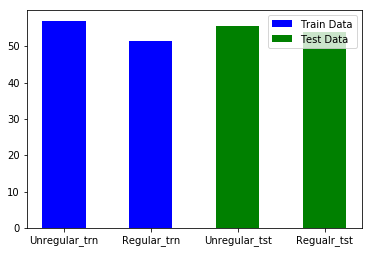

In [15]:
data_x1 = ["Unregular_trn", "Regular_trn"]
data_y1 = [accuracy_score(trny, tree_pred_trn) * 100, accuracy_score(trny, tree_pred_trn_scale) * 100]
data_x2 = ["Unregular_tst", "Regualr_tst"]
data_y2 = [accuracy_score(tsty, tree_pred_tst) * 100, accuracy_score(tsty, tree_pred_tst_scale) * 100]

plt.bar(data_x1, data_y1, label = "Train Data", color = "b", width = 0.5)
plt.bar(data_x2, data_y2, label = "Test Data", color = "g", width = 0.5)
plt.legend()

plt.show()